<a href="https://colab.research.google.com/github/Jittiya/multivariate/blob/main/Chapter_4_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multidimensional Scaling

# 1.   รายการในลิสต์

---


2.   รายการในลิสต์

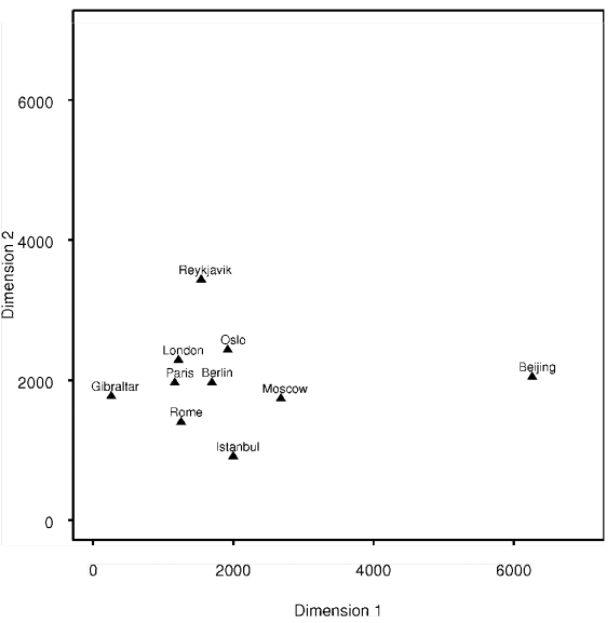

# **Example on iris dataset**

In [5]:
import pandas as pd

In [6]:
example_df = pd.read_csv('https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/iris.csv')
example_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
from sklearn.decomposition import  PCA

In [8]:
pca = PCA(n_components=2)

In [55]:
X_pca = pca.fit_transform(X)

In [10]:
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


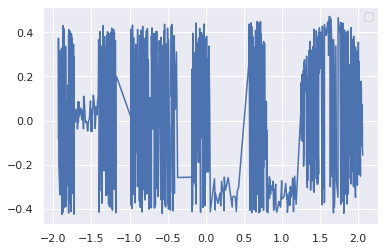

In [56]:
plt.plot(X_pca[:,0],X_pca[:,1])
plt.legend()

## MDS (Multidimensional Scaling)

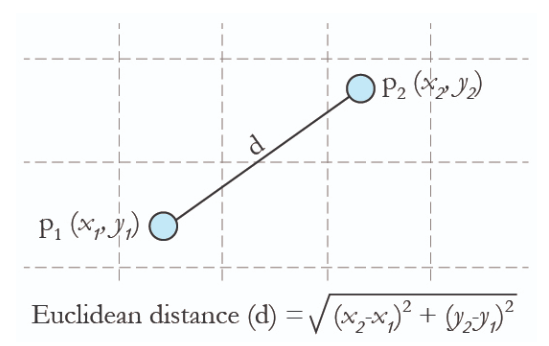

# Distance

In [12]:
X1 = example_df.iloc[0,:-1].to_numpy()
X1

array([5.1, 3.5, 1.4, 0.2], dtype=object)

In [13]:
X2 = example_df.iloc[1,:-1].to_numpy()
X2

array([4.9, 3.0, 1.4, 0.2], dtype=object)

In [14]:
import numpy as np

In [15]:
dist = np.linalg.norm(X1-X2)
dist

0.5385164807134502

In [16]:
(0.04 + 0.25)**(0.05)

0.9399827849205659

## Distance Matrix

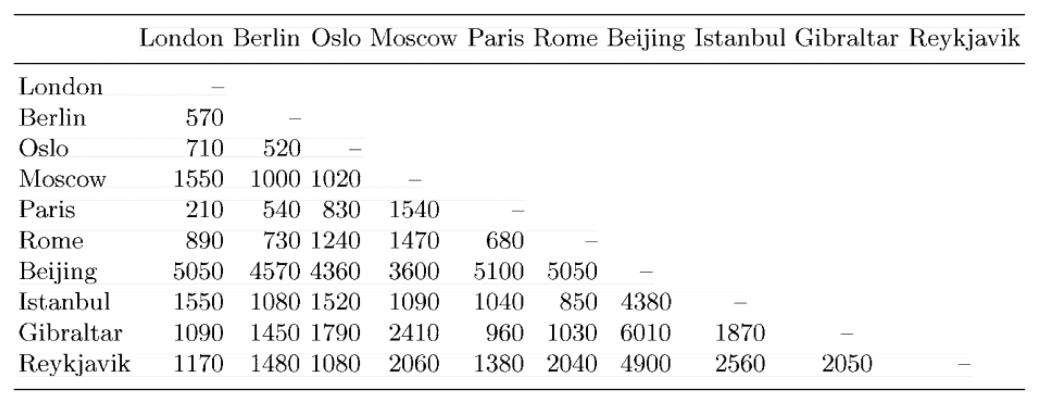

In [17]:
from sklearn.metrics import pairwise_distances
dis_matrix = pairwise_distances(example_df.iloc[:,:-1])
dis_matrix

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

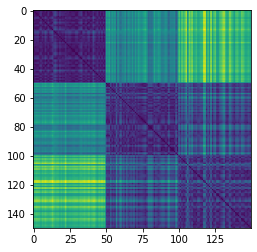

In [18]:
plt.imshow(dis_matrix)

## ทำ MDS 

In [19]:
from sklearn.manifold import  MDS

In [20]:
mds = MDS(n_components=2)

In [21]:
new_mds = mds.fit_transform(example_df.iloc[:,:-1])

In [22]:
new_mds

array([[-1.45684504e-01,  2.71066678e+00],
       [ 3.75451489e-01,  2.70397384e+00],
       [ 3.01853860e-01,  2.89122916e+00],
       [ 4.92117637e-01,  2.72650731e+00],
       [-1.73874782e-01,  2.76099376e+00],
       [-6.17287652e-01,  2.33225146e+00],
       [ 2.24950257e-01,  2.85101353e+00],
       [ 5.57351771e-04,  2.63892147e+00],
       [ 7.25987704e-01,  2.86556405e+00],
       [ 2.93596483e-01,  2.66497975e+00],
       [-4.91000243e-01,  2.55049978e+00],
       [ 1.33706557e-01,  2.61496700e+00],
       [ 4.25794297e-01,  2.77370014e+00],
       [ 6.79440940e-01,  3.21225259e+00],
       [ 9.13613638e-01,  2.75757750e+00],
       [-1.20589473e+00,  2.48572679e+00],
       [-6.64059774e-01,  2.68823294e+00],
       [-1.51708656e-01,  2.67480526e+00],
       [-7.39879448e-01,  2.25682651e+00],
       [-3.83551526e-01,  2.63437473e+00],
       [-2.46387926e-01,  2.32708829e+00],
       [-3.05397330e-01,  2.57956134e+00],
       [ 1.93011785e-02,  3.25658535e+00],
       [ 3.

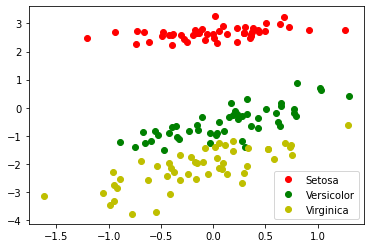

In [23]:
plt.plot(new_mds[:50,0],new_mds[:50,1], 'or' , label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1], 'og' , label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1], 'oy' , label='Virginica')
plt.legend()

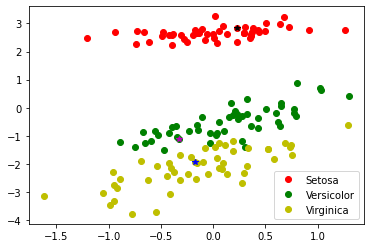

In [24]:
plt.plot(new_mds[:50,0],new_mds[:50,1], 'or' , label='Setosa')
plt.plot(new_mds[50:100,0],new_mds[50:100,1], 'og' , label='Versicolor')
plt.plot(new_mds[100:,0],new_mds[100:,1], 'oy' , label='Virginica')
plt.plot(new_mds[6,0],new_mds[6,1], '*k')
plt.plot(new_mds[56,0],new_mds[56,1], '*m')
plt.plot(new_mds[116,0],new_mds[116,1], '*b')
plt.legend()

### การใช้ Pre-computed Distance Matrix

In [25]:
mds2 = MDS(n_components=2, dissimilarity='precomputed')

In [26]:
new_mds2 = mds2.fit_transform(dis_matrix)

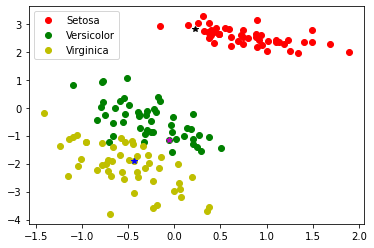

In [27]:
plt.plot(new_mds2[:50,0],new_mds2[:50,1], 'or' , label='Setosa')
plt.plot(new_mds2[50:100,0],new_mds2[50:100,1], 'og' , label='Versicolor')
plt.plot(new_mds2[100:,0],new_mds2[100:,1], 'oy' , label='Virginica')
plt.plot(new_mds[6,0],new_mds2[6,1], '*k')
plt.plot(new_mds2[56,0],new_mds2[56,1], '*m')
plt.plot(new_mds2[116,0],new_mds2[116,1], '*b')
plt.legend()

# Example 2

https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html?fbclid=IwAR1PP7bL5QkJyYM87IG3GE4gLdKAYkz8TXDp1sgIhVDWPi8JrjCT4wkHJVs

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [29]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

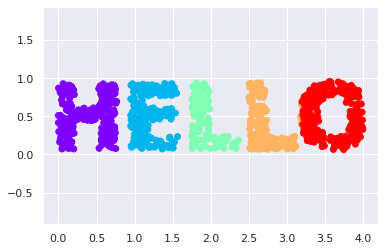

In [30]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [31]:
X = make_hello(1000)

In [32]:
X.shape

(1000, 2)

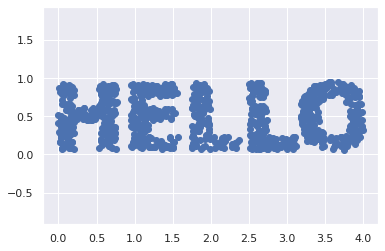

In [33]:
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

In [34]:
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))

In [36]:
colorize['c'].shape

(1000,)

In [37]:
colorize['cmap']

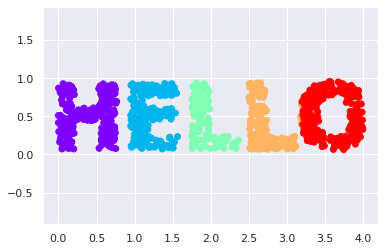

In [39]:
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [40]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

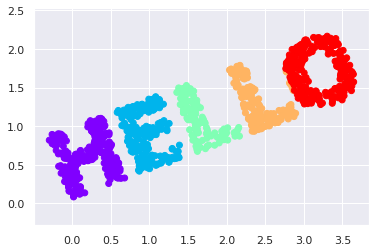

In [42]:
X2 = rotate(X, 20) 
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');\

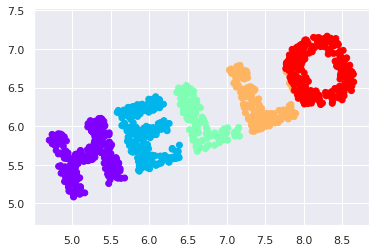

In [43]:
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

### MDS

In [44]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

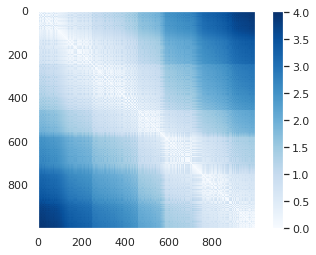

In [48]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();  ##บอก scale bar ว่าหมายถึงอะไร

In [49]:
D2 = pairwise_distances(X2)

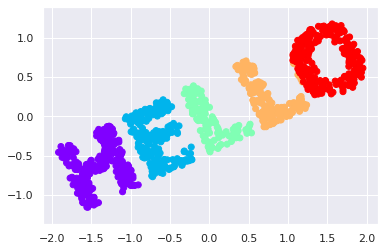

In [50]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

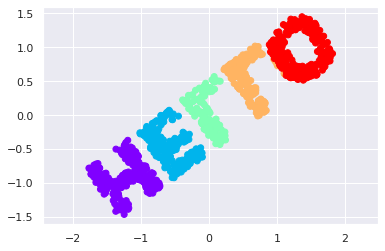

In [52]:
model = MDS(n_components=2, dissimilarity='precomputed')
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

# Quiz 4
 
#    ทดสองทำ pca กับข้อมูล ```X``` แล้ว plotgraph
#    และดูผลว่าการกระจายของข้อูลมันเปลี่ยนแปลงไปหรือไม่ อย่างไร

ส่งก่อน 14.15  commit ว่า quiz 4




In [57]:
from sklearn.decomposition import  PCA

In [58]:
pca = PCA(n_components=2)

In [59]:
X_pca = pca.fit_transform(X)

In [60]:
from matplotlib import pyplot as plt

No handles with labels found to put in legend.


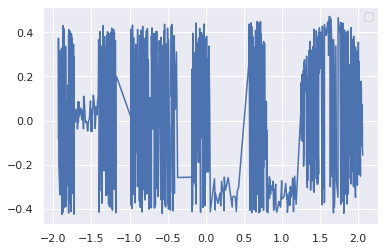

In [61]:
plt.plot(X_pca[:,0],X_pca[:,1])
plt.legend()

* zorder